## Results of the Mean Imputation Data
<hr/>

</h3>We considered the data which has mean imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df1_train = pd.read_csv("../../../../main/sub_data/single_variant/mean/train/train_mean.csv",index_col='Date',parse_dates=True)
df1_test = pd.read_csv("../../../../main/sub_data/single_variant/mean/test/test_mean.csv",index_col='Date',parse_dates=True)

In [3]:
df1_train

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-04-26,4445.0
2023-04-27,4626.0
2023-04-28,4395.0


In [4]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [5]:
sarima_1 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(1,0,1,7)).fit()
print(sarima_1.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.65341D+00    |proj g|=  2.32925D-01

At iterate    5    f=  7.62563D+00    |proj g|=  5.90917D-04

At iterate   10    f=  7.62560D+00    |proj g|=  5.91348D-03

At iterate   15    f=  7.62555D+00    |proj g|=  2.62069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   2.621D-05   7.626D+00
  F =   7.6255545937961298     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

In [6]:
get_MAPE_MAE(df1_train,sarima_1)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_1)

The MAPE Score is :  25.973903526649206
The MAE Score is : 369.3504785860667
--------------------------------------------------------------------
The MAPE Score is :  17.382692084020835
The MAE Score is : 369.3504785860667


(17.382692084020835, 369.3504785860667)

In [7]:
sarima_2 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(1,1,1,7)).fit()
print(sarima_2.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61424D+00    |proj g|=  1.16311D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   4.773D-05   7.607D+00
  F =   7.6073807935051168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Mode

In [8]:
get_MAPE_MAE(df1_train,sarima_2)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_2)

The MAPE Score is :  26.14127576947424
The MAE Score is : 368.4135612205466
--------------------------------------------------------------------
The MAPE Score is :  16.831859947999142
The MAE Score is : 368.4135612205466


(16.831859947999142, 368.4135612205466)

## Brute Force Approach without the non-seasonal Component

<p>This experiment only captures the non-seasonal component for the original df with the length of Seasonal Cycle 7</p>

    Inference Results
<ul>
<li>SARIMA(0,0,0)(3,0,6,7) has the highest and lowest AIC and BIC</li>
</ul>

In [9]:
# results1 = []
# for i in range(7):
#     for j in range(7):
#         try:
#             x = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(i,0,j,7)).fit()
#             results1.append((i,j,x.aic,x.bic))
#         except:
#             results1.append(i,j,None,None)

In [10]:
# results1 = pd.DataFrame(results1,columns=['P','Q','AIC','BIC'])
# results1.to_csv("sarima_results1.csv")

In [11]:
results1 = pd.read_csv("sarima_results1.csv")

In [12]:
results1.sort_values("AIC")

,Unnamed: 0,P,Q,AIC,BIC
44,44,6,2,55932.485392,55988.386294
27,27,3,6,55936.723793,55998.835906
48,48,6,6,55947.427344,56028.173091
40,40,5,5,55950.442307,56018.765631
41,41,5,6,55950.471725,56025.006261
45,45,6,3,55950.804298,56012.916411
24,24,3,3,56004.056047,56047.534526
47,47,6,5,56013.933209,56088.467745
46,46,6,4,56020.579782,56088.903107
25,25,3,4,56083.805820,56133.495511


In [13]:
sarima_3 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(6,0,2,7)).fit()
print(sarima_3.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63615D+00    |proj g|=  1.93576D-01


 This problem is unconstrained.



At iterate    5    f=  7.61604D+00    |proj g|=  3.66827D-03

At iterate   10    f=  7.61596D+00    |proj g|=  1.93075D-04

At iterate   15    f=  7.61590D+00    |proj g|=  1.19248D-02

At iterate   20    f=  7.61534D+00    |proj g|=  1.78757D-03

At iterate   25    f=  7.61534D+00    |proj g|=  2.59230D-04

At iterate   30    f=  7.61520D+00    |proj g|=  1.14377D-02

At iterate   35    f=  7.61179D+00    |proj g|=  2.42883D-02

At iterate   40    f=  7.60756D+00    |proj g|=  1.91005D-02

At iterate   45    f=  7.60356D+00    |proj g|=  1.03504D-02

At iterate   50    f=  7.59295D+00    |proj g|=  1.35378D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                       SARIMAX(6, 0, [1, 2], 7)   Log Likelihood              -27957.243
Date:                                Tue, 18 Jul 2023   AIC                          55932.485
Time:                                        08:06:01   BIC                          55988.386
Sample:                                    04-01-2013   HQIC                         55952.384
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        2.3276      0.047     49.248      0.000       2.235       2.420
ar.

In [14]:
get_MAPE_MAE(df1_train,sarima_3)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_3)

The MAPE Score is :  25.355559951643233
The MAE Score is : 361.1560365205253
--------------------------------------------------------------------
The MAPE Score is :  15.39890358399318
The MAE Score is : 361.1560365205253


(15.39890358399318, 361.1560365205253)

In [15]:
sarima_4 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(6,1,2,7)).fit()
print(sarima_4.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61544D+00    |proj g|=  1.72630D-01


 This problem is unconstrained.



At iterate    5    f=  7.59914D+00    |proj g|=  2.10757D-03

At iterate   10    f=  7.59840D+00    |proj g|=  3.05860D-02

At iterate   15    f=  7.59744D+00    |proj g|=  1.75997D-03

At iterate   20    f=  7.59728D+00    |proj g|=  1.62990D-02

At iterate   25    f=  7.59710D+00    |proj g|=  7.56177D-03

At iterate   30    f=  7.59703D+00    |proj g|=  4.57572D-03

At iterate   35    f=  7.59685D+00    |proj g|=  4.76477D-03

At iterate   40    f=  7.59645D+00    |proj g|=  3.74005D-02

At iterate   45    f=  7.59603D+00    |proj g|=  1.71667D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.59600D+00    |proj g|=  3.25299D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   3.253D-03   7.596D+00
  F =   7.5960029958749802     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                       SARIMAX(6, 1, [1, 2], 7)   Log Likelihood              -27968.483
Date:                                Tue, 18 Jul 2023   AIC                 

In [16]:
get_MAPE_MAE(df1_train,sarima_4)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_4)

The MAPE Score is :  26.404612179177168
The MAE Score is : 363.6392151218639
--------------------------------------------------------------------
The MAPE Score is :  16.173448237493744
The MAE Score is : 363.6392151218639


(16.173448237493744, 363.6392151218639)

In [17]:
sarima_5 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(3,0,6,7)).fit()
print(sarima_5.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64904D+00    |proj g|=  2.72356D-01


 This problem is unconstrained.



At iterate    5    f=  7.61422D+00    |proj g|=  1.01716D-03

At iterate   10    f=  7.61415D+00    |proj g|=  4.32952D-03

At iterate   15    f=  7.61408D+00    |proj g|=  2.60499D-03

At iterate   20    f=  7.61386D+00    |proj g|=  1.94620D-03

At iterate   25    f=  7.61363D+00    |proj g|=  2.55799D-02

At iterate   30    f=  7.60722D+00    |proj g|=  3.71026D-02

At iterate   35    f=  7.59847D+00    |proj g|=  2.53299D-02

At iterate   40    f=  7.59687D+00    |proj g|=  1.55305D-02

At iterate   45    f=  7.59526D+00    |proj g|=  1.81040D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.59325D+00    |proj g|=  1.41708D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     66      1     0     0   1.417D-02   7.593D+00
  F =   7.5932541815333359     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                        SARIMAX Results                                         
Dep. Variable:       Max.Demand met during the day (MW)   No. Observations:                 3682
Model:             SARIMAX(3, 0, [1, 2, 3, 4, 5, 6], 7)   Log Likelihood              -27958.362
Date:                                  Tue, 18 Jul 2023   AIC         

In [18]:
get_MAPE_MAE(df1_train,sarima_5)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_5)

The MAPE Score is :  25.153171473647287
The MAE Score is : 357.8210436027327
--------------------------------------------------------------------
The MAPE Score is :  15.758350602262558
The MAE Score is : 357.8210436027327


(15.758350602262558, 357.8210436027327)

In [19]:
sarima_6 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(3,1,6,7)).fit()
print(sarima_6.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63067D+00    |proj g|=  2.53807D-01


 This problem is unconstrained.



At iterate    5    f=  7.59792D+00    |proj g|=  4.38751D-03

At iterate   10    f=  7.59682D+00    |proj g|=  7.46728D-03

At iterate   15    f=  7.59676D+00    |proj g|=  1.00566D-04

At iterate   20    f=  7.59676D+00    |proj g|=  8.59846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     28      1     0     0   2.053D-05   7.597D+00
  F =   7.5967554170071043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                        SARIMAX Results                                         
Dep. Variable:       Max.Demand met during the day (MW)   No. Observations:   

In [20]:
get_MAPE_MAE(df1_train,sarima_6)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_6)

The MAPE Score is :  26.44484406420435
The MAE Score is : 363.37813133712984
--------------------------------------------------------------------
The MAPE Score is :  15.958727279432392
The MAE Score is : 363.37813133712984


(15.958727279432392, 363.37813133712984)

## Find P and Q for S

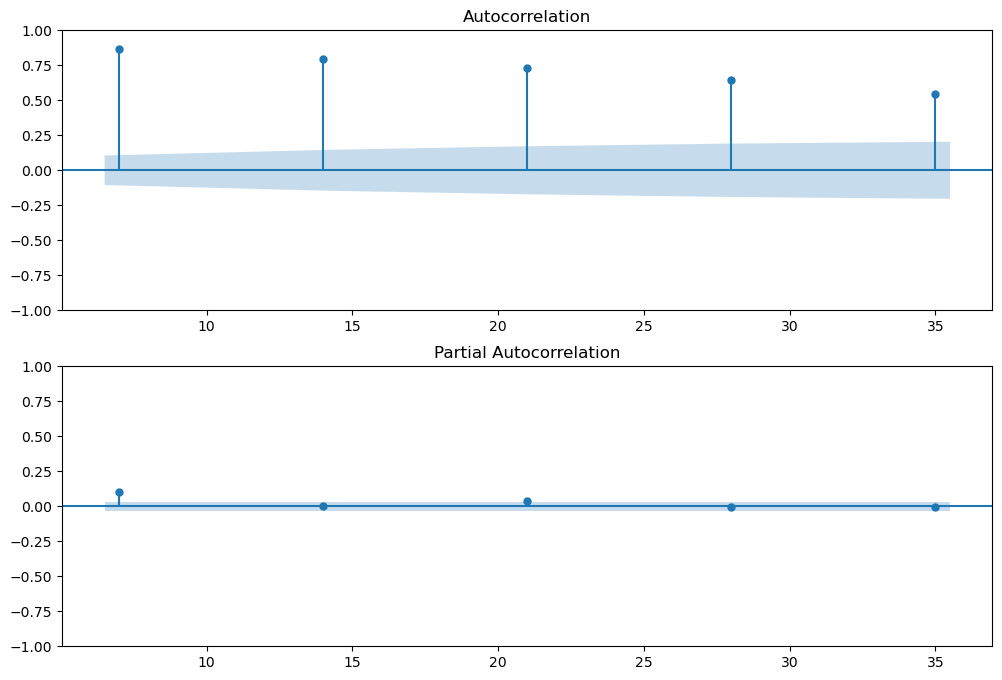

In [21]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df1_train,lags=[7,14,21,28,35],zero=False,ax=ax1)
plot_pacf(df1_train,lags=[7,14,21,28,35],zero=False,ax=ax2)
plt.show()

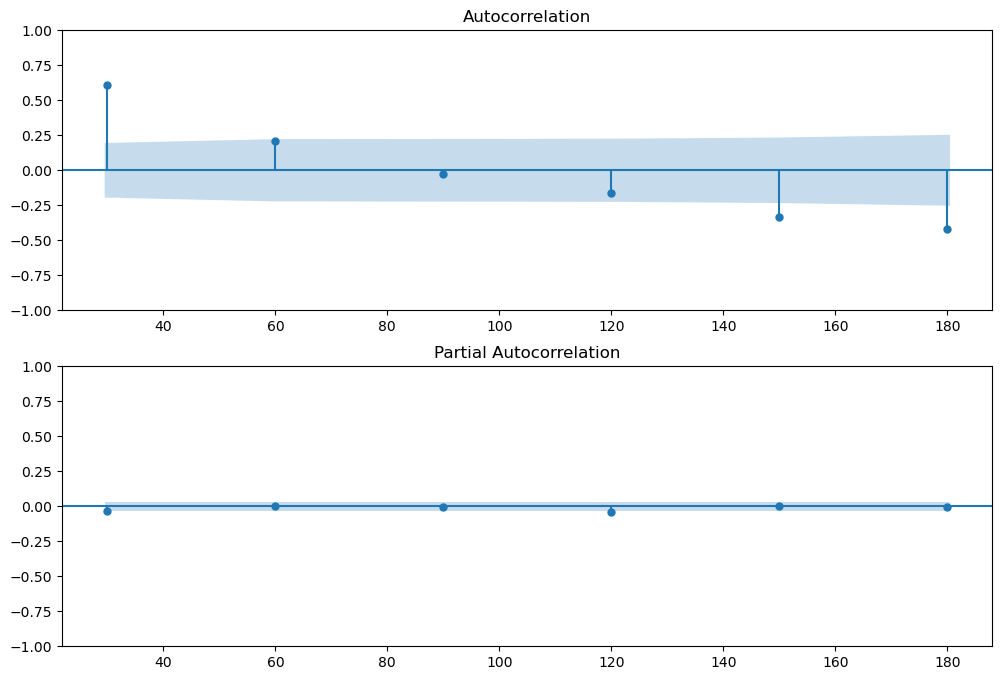

In [22]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df1_train,lags=[30,60,90,120,150,180],zero=False,ax=ax1)
plot_pacf(df1_train,lags=[30,60,90,120,150,180],zero=False,ax=ax2)
plt.show()

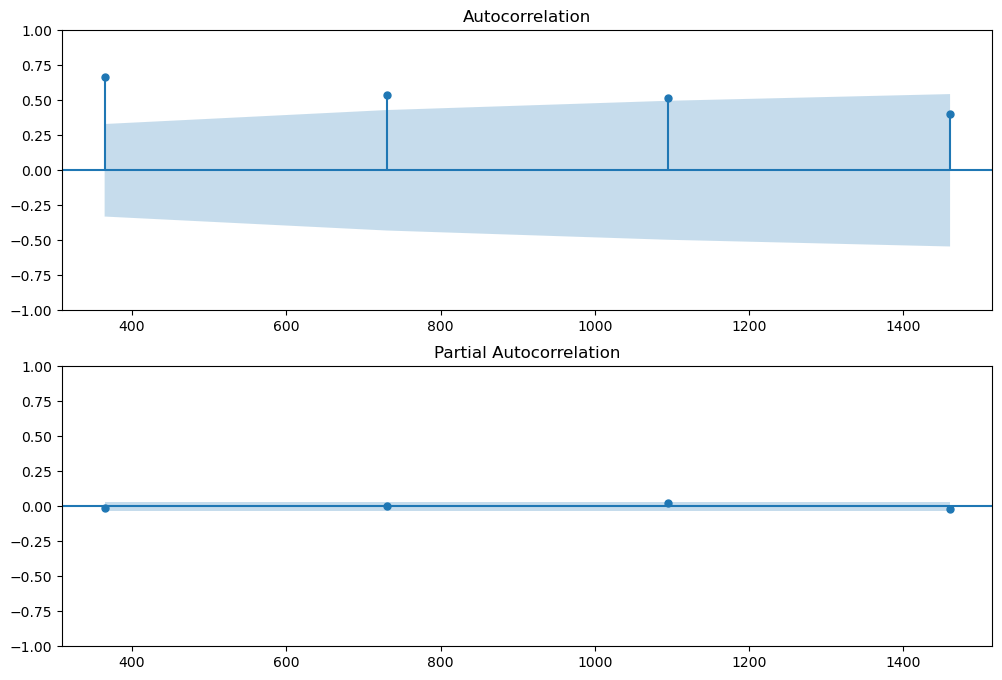

In [23]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df1_train,lags=[365,730,1095,1460],zero=False,ax=ax1)
plot_pacf(df1_train,lags=[365,730,1095,1460],zero=False,ax=ax2)
plt.show()

In [24]:
# orders = [(1,0,0),(2,0,0),(1,1,0),(1,2,0),(0,0,1),(0,1,1)]
# results2 = []
# for o in orders:
#     try:
#         res = SARIMAX(df1_train,orders=o,seasonal_order=(6,0,2,7)).fit()
#         results2.append((3,6,res.aic,res.bic,get_MAPE_MAE(df1_train,res)[0],get_MAPE_MAE(df1_train,res)[1],get_MAPE_MAE_test(df1_test,res)[0],get_MAPE_MAE_test(df1_test,res)[1]))
#     except:
#         results2.append((3,6,None,None,None,None,None,None))


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01

At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01

At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01

At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


In [25]:
# orders = [(0,2,1),(8,0,8),(8,1,8),(9,0,7),(9,1,7),(8,0,9),(8,1,9)]
# for o in orders:
#     try:
#         res = SARIMAX(df1_train,orders=o,seasonal_order=(6,0,2,7)).fit()
#         results2.append((3,6,res.aic,res.bic,get_MAPE_MAE(df1_train,res)[0],get_MAPE_MAE(df1_train,res)[1],get_MAPE_MAE_test(df1_test,res)[0],get_MAPE_MAE_test(df1_test,res)[1]))
#     except:
#         results2.append((3,6,None,None,None,None,None,None))
# results2 = pd.DataFrame(results2,columns=['P','Q','AIC','BIC','MAPE_train','MAE_train','MAPE_test','MAE_test'])

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01

At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18905D+00    |proj g|=  2.59603D-01


 This problem is unconstrained.



At iterate    5    f=  7.05049D+00    |proj g|=  1.91620D-02

At iterate   10    f=  7.03857D+00    |proj g|=  1.54056D-03

At iterate   15    f=  7.03856D+00    |proj g|=  2.30961D-03

At iterate   20    f=  7.03788D+00    |proj g|=  1.74302D-02

At iterate   25    f=  7.03770D+00    |proj g|=  3.74833D-04

At iterate   30    f=  7.03760D+00    |proj g|=  6.29418D-03

At iterate   35    f=  7.03662D+00    |proj g|=  1.33990D-02

At iterate   40    f=  7.02893D+00    |proj g|=  3.81059D-02

At iterate   45    f=  7.02513D+00    |proj g|=  3.35499D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.02456D+00    |proj g|=  1.49818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   1.498D-03   7.025D+00
  F =   7.0245649158022516     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  25.884755420311897
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832
The MAPE Score is :  17.775239402312963
The MAE Score is : 180.73993308981832


In [30]:
results2 = pd.read_csv("sarima_results2.csv")